### 1. Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
)
from utils.utils import plot_confusion_matrix, generate_tensor

### 2. Loading the dataset

In [2]:
dataset = pd.read_csv('../dataset/dataset.csv')

### 3. Preparing the data

In [3]:
test_df = dataset.sample(frac=1.0, random_state=42)

In [4]:
test_data = generate_tensor(test_df, image_size=(150,150))

Found 480 validated image filenames belonging to 2 classes.


### 4. Loading the VGG16 model

In [5]:
model = tf.keras.models.load_model('./models/trained/vgg_model.h5')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

### 5. Making predictions

In [6]:
y_pred = np.squeeze(model.predict(test_data) >= 0.5).astype(np.int32)

15/15 [==============================] - 44s 3s/step


In [7]:
x = f1_score(y_true=test_data.labels, y_pred=y_pred, average='weighted')
y = precision_score(y_true=test_data.labels, y_pred=y_pred, average='weighted')
z = recall_score(y_true=test_data.labels, y_pred=y_pred, average='weighted')

In [8]:
print(f'F1 Score: {round(x*100,2)}%')
print(f'Precision Score: {round(y*100,2)}%')
print(f'Recall Score: {round(z*100,2)}%')

F1 Score: 97.92%
Precision Score: 98.0%
Recall Score: 97.92%


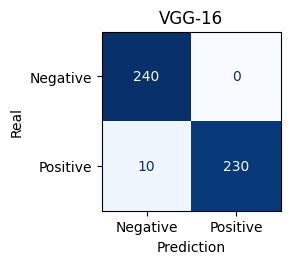

In [9]:
disp = plot_confusion_matrix(test_data.labels, y_pred, title='VGG-16')

plt.show()

In [10]:
disp.figure_.savefig('./models/figures/vgg16/VGG-confusion-matrix.eps')
disp.figure_.savefig('./models/figures/vgg16/VGG-confusion-matrix.png')

### 6. Evaluating the model

In [11]:
loss, acc = model.evaluate(test_data)

15/15 [==============================] - 40s 3s/step - loss: 0.0632 - accuracy: 0.9792


In [12]:
print(f'acc: {round(acc*100,2)}%')
print(f'loss: {loss}' )

acc: 97.92%
loss: 0.06324051320552826
